# ENSEMBLE MODEL: VARIOUS TYPE

Menggabungkan beberapa algoritma yang berbeda:
- Voting
- Stacking


In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# train test split
from sklearn.model_selection import train_test_split

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import OrdinalEncoder, BinaryEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler 

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score 

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [2]:
from sklearn.preprocessing import PolynomialFeatures

## **1. load dataset**

In [3]:
# load dataset
df = pd.read_csv('white_wine.csv')[['density', 'alcohol', 'quality']]
df.head() 

,density,alcohol,quality
0,1.0010,8.8,6.0
1,0.9940,9.5,6.0
2,0.9951,10.1,6.0
3,0.9956,9.9,6.0
4,0.9956,9.9,6.0


In [4]:
# quality > 6 adalah kelas 1
# quality <= 6 adalah kelas 0

df['quality'] = np.where(df['quality']>6, 1, 0)
df.head()

,density,alcohol,quality
0,1.0010,8.8,0
1,0.9940,9.5,0
2,0.9951,10.1,0
3,0.9956,9.9,0
4,0.9956,9.9,0


In [5]:
df.isna().sum()

density    0
alcohol    1
quality    0
dtype: int64

In [6]:
df = df.dropna()
df.shape 

(519, 3)

In [7]:
df = df.drop_duplicates()
df.shape 

(368, 3)

## **2. EDA**

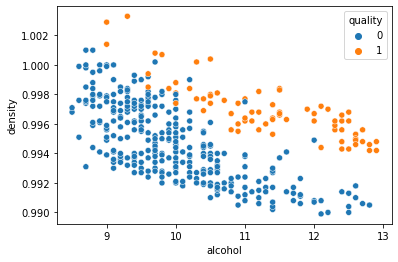

In [8]:
sns.scatterplot(data=df, x='alcohol', y='density', hue='quality');

## **3. Define X y**

In [9]:
# Define X y
X = df.drop(columns='quality')
y = df['quality']

In [10]:
y.value_counts() / len(y)
# imbalance

0    0.80163
1    0.19837
Name: quality, dtype: float64

## **4. Data Splitting**

In [1]:
# Data splitting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10, stratify=y)

NameError: name 'train_test_split' is not defined

In [12]:
from sklearn.metrics import f1_score

## **5. Preprocessing**

In [13]:
# define polynomial
poly = PolynomialFeatures(degree=3)

In [14]:
transformer = ColumnTransformer([
    ('poly', poly, ['alcohol', 'density'])
], remainder='passthrough')

## **6. Cross Validation**